<h1>4.2「課題3」に対する分析過程</h1>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import japanize_matplotlib

pd.set_option('display.max_columns', 500) 

<h1>データの読み込み</h1>

In [67]:
# 都道府県の「稼ぐ力」に関するデータ
all_data = pd.read_csv('pre_earning_power.csv')
all_data.head()

,都道府県,01農業,02林業,03漁業（水産養殖業を除く）,04水産養殖業,05鉱業，採石業，砂利採取業,06総合工事業,07職別工事業（設備工事業を除く）,08設備工事業,09食料品製造業,10飲料・たばこ・飼料製造業,11繊維工業,12木材・木製品製造業（家具を除く）,13家具・装備品製造業,14パルプ・紙・紙加工品製造業,15印刷・同関連業,16化学工業,17石油製品・石炭製品製造業,18プラスチック製品製造業,19ゴム製品製造業,20なめし革・同製品・毛皮製造業,21窯業・土石製品製造業,22鉄鋼業,23非鉄金属製造業,24金属製品製造業,25はん用機械器具製造業,26生産用機械器具製造業,27業務用機械器具製造業,28電子部品・デバイス・電子回路製造業,29電気機械器具製造業,30情報通信機械器具製造業,31輸送用機械器具製造業,32その他の製造業,33電気業,34ガス業,35熱供給業,36水道業,37通信業,38放送業,39情報サービス業,40インターネット附随サービス業,41映像・音声・文字情報制作業,42鉄道業,43道路旅客運送業,44道路貨物運送業,45水運業,46航空運輸業,47倉庫業,48運輸に附帯するサービス業,49郵便業（信書便事業を含む）,50各種商品卸売業,51繊維・衣服等卸売業,52飲食料品卸売業,53建築材料，鉱物・金属材料等卸売業,54機械器具卸売業,55その他の卸売業,56各種商品小売業,57織物・衣服・身の回り品小売業,58飲食料品小売業,59機械器具小売業,60その他の小売業,61無店舗小売業,62銀行業,63協同組織金融業,64クレジットカード業等非預金信用機関,65金融商品取引業，商品先物取引業,66補助的金融業等,67保険業（保険媒介代理業等を含む）,68不動産取引業,69不動産賃貸業・管理業,70物品賃貸業,71学術・開発研究機関,72専門サービス業,73広告業,74技術サービス業,75宿泊業,76飲食店,77持ち帰り・配達飲食サービス業,78洗濯・理容・美容・浴場業,79その他の生活関連サービス業,80娯楽業,81学校教育,82その他の教育，学習支援業,83医療業,84保健衛生,85社会保険・社会福祉・介護事業,86郵便局,87協同組合（他に分類されないもの）,88廃棄物処理業,89自動車整備業,90機械等修理業（別掲を除く）,91職業紹介・労働者派遣業,92その他の事業サービス業,93政治・経済・文化団体,94宗教,95その他のサービス業,97国家公務,98地方公務
0,北海道,0.79324,0.86817,1.60322,0.33196,0.33181,0.32138,0.22525,0.09726,0.40879,-0.31967,-1.60134,0.14331,-0.38276,-0.27526,-0.41863,-1.47796,-0.28385,-1.32337,-1.85152,-2.10330,-0.31792,-0.39239,-2.59183,-0.72383,-1.29720,-1.13815,-2.64734,-0.85783,-2.01643,-1.84384,-1.19373,-1.17299,0.26899,-0.19680,1.15344,0.25169,-0.45669,-0.17439,-0.61323,-0.85789,-0.35861,-0.01681,0.47782,0.18497,0.00594,-1.0748,-0.32124,-0.13127,-0.83394,-0.97637,-0.97249,0.24540,0.01426,-0.26100,-0.07580,0.35046,-0.01611,0.14928,0.13771,0.29748,-0.10712,-0.41729,0.17676,-0.21625,-1.40007,-0.19476,0.05472,-0.37614,0.12208,0.08961,-0.61202,-0.43043,-0.48532,-0.07466,0.36686,-0.08475,0.07571,0.14940,-0.09616,0.04388,0.05852,-0.44884,0.11320,-0.02906,0.13317,0.50490,0.59233,0.16141,0.40364,-0.08390,-0.57832,0.20388,0.10915,0.01403,0.58532,0.86427,0.21782
1,青森県,0.61851,0.96804,1.37344,-0.10230,0.34905,0.57222,0.30884,0.18581,0.27869,-0.00478,0.29339,-0.37126,-0.69721,-0.49897,-0.47719,-1.97508,-0.64264,-1.54141,-1.85595,-3.79866,-0.18050,-0.26321,0.70925,-0.85047,-2.19628,-0.80388,0.78538,0.72462,-0.48240,-1.46357,-1.60160,-0.99729,0.41946,-0.53996,－,-0.81890,-0.59170,0.04262,-1.43194,-0.72889,-0.78363,-0.21746,0.37046,0.13860,-0.86102,-2.75750,-0.61822,-0.54582,-0.26701,-0.56948,-1.55690,0.55817,-0.04000,-0.46563,-0.38882,0.03040,-0.07623,0.19699,0.25427,0.34435,0.16971,0.12947,-0.00029,-0.74490,-1.26092,-0.68756,0.08299,-0.76016,-0.40641,-0.08688,-1.16508,-0.59656,-1.32163,-0.07851,0.16983,-0.26072,-0.04716,0.24718,0.15188,-0.11970,0.03829,-0.47876,-0.22379,0.41406,0.36954,0.21698,0.51103,0.34183,0.64860,0.00130,-0.93740,-0.11330,-0.00860,-1.03608,0.13091,1.09548,0.41394
2,岩手県,0.80425,1.28133,1.2657200000000002,0.49396,0.89708,0.60375,0.26139,-0.00081,0.39762,-0.15614,0.20821,0.49510,-0.63065,-0.34456,-0.34271,-0.99390,-0.65712,-0.13562,-0.71413,-0.70264,0.30820,0.07438,-0.56719,-0.15954,0.33544,0.51458,0.13716,0.91784,-0.31016,0.05515,-0.14758,0.11124,0.09759,-0.56623,0.9081799999999999,0.56862,-0.80984,0.16770,-1.33318,-0.97545,-0.56582,0.54606,0.23559,0.20587,-1.88388,-3.4045699999999997,-0.67647,-0.55762,-0.25833,-0.19239,-1.34454,0.15655,-0.04035,-0.34470,-0.35965,-0.33060,-0.07446,0.14333,0.29302,0.28858,-0.10024,-0.02729,-0.05807,-0.87864,-1.72890,-0.62477,-0.12507,-0.98198,-0.16002,0.20804,-1.21611,-0.75694,-1.24278,-0.14246,0.49122,-0.34764,-0.20510,0.08940,0.03042,-0.10052,-0.35982,-0.53403,-0.27388,0.37990,0.28957,0.31676,0.97781,0.30677,0.50393,-0.34810,-0.59516,-0.40556,0.24877,-0.08923,0.54168,-0.20048,0.45596
3,宮城県,-0.09540,0.10956,0.53074,0.17381,-0.32408,0.48236,0.33447,0.34295,0.12456,-0.32460,-0.81823,-0.35805,-0.43838,-0.35563,-0.16000,-1.43513,-0.10121,-0.65743,0.11727,-2.16736,-0.09191,-0.61036,-0.65596,-0.35907,-1.28806,-0.21661,-0.36950,0.69881,-0.32677,-0.19318,-0.36312,-0.84085,0.69632,-1.95903,-2.87538,0.08528,0.06609,0.05126,-0.49045,-0.56975,-0.51355,0.08912,0.20878,0.2

In [68]:
#都道府県の緯度・経度データ
latlng_data = pd.read_csv("latlng_data.csv")
latlng_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,緯度,経度
0,1,北海道,札幌市,43.06417,141.34694
1,2,青森県,青森市,40.82444,140.74000
2,3,岩手県,盛岡市,39.70361,141.15250
3,4,宮城県,仙台市,38.26889,140.87194
4,5,秋田県,秋田市,39.71861,140.10250


<h1>データの前処理</h1>

In [69]:
#nanデータを0で補完
all_data = all_data.replace('－',0)

In [70]:
#無限方向に丸める
import math
from decimal import Decimal, ROUND_HALF_UP,ROUND_UP

round_towards_infinity = lambda x : Decimal(str(x)).quantize(Decimal('0'), rounding=ROUND_UP)

all_data.iloc[:,1:] = all_data.iloc[:,1:].applymap(round_towards_infinity)

In [71]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 98 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   都道府県                 47 non-null     object
 1   01農業                 47 non-null     object
 2   02林業                 47 non-null     object
 3   03漁業（水産養殖業を除く）       47 non-null     object
 4   04水産養殖業              47 non-null     object
 5   05鉱業，採石業，砂利採取業       47 non-null     object
 6   06総合工事業              47 non-null     object
 7   07職別工事業（設備工事業を除く）    47 non-null     object
 8   08設備工事業              47 non-null     object
 9   09食料品製造業             47 non-null     object
 10  10飲料・たばこ・飼料製造業       47 non-null     object
 11  11繊維工業               47 non-null     object
 12  12木材・木製品製造業（家具を除く）   47 non-null     object
 13  13家具・装備品製造業          47 non-null     object
 14  14パルプ・紙・紙加工品製造業      47 non-null     object
 15  15印刷・同関連業            47 non-null     object
 16  16化学工業    

<h1>PCA</h1>

<BarContainer object of 47 artists>

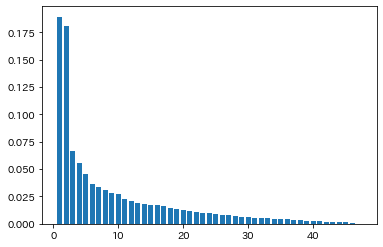

In [72]:
from sklearn.decomposition import PCA

pca_data = all_data.iloc[:,1:]

pca = PCA()
pca.fit(pca_data)

plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [73]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,1.893573e-01
1,1.804871e-01
2,6.671712e-02
3,5.564834e-02
4,4.524379e-02
5,3.638158e-02
6,3.327326e-02
7,3.065436e-02
8,2.774905e-02
9,2.749675e-02


In [74]:
# 累積寄与率が0.7を超えるように、主成分を選択する。
val_sum = 0
for i in range(len(pca.explained_variance_ratio_)):
    val_sum += pca.explained_variance_ratio_[i]
    if val_sum > 0.7:
        break
n_components = i
print(n_components)

10


In [75]:
# 第１０成分までを選択する。
pca = PCA(n_components=n_components)
pca.fit(pca_data)
feature = pca.transform(pca_data)
pca_scores = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(n_components)])
pca_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-7.306000,3.418461,0.052728,1.423153,-0.835612,-0.492620,2.721380,0.391934,0.488095,1.727671
1,-4.794183,0.059707,-3.698114,0.465701,-1.620882,-0.699087,3.127160,-1.363836,-0.445052,1.438762
2,-2.754305,-3.875424,-3.132638,-0.038301,-2.045456,-1.438382,2.432904,0.180644,-1.972878,-1.794787
3,-2.235200,2.449872,-1.827686,-1.153839,-4.437192,-2.184572,0.966990,-2.427510,2.859231,1.975368
4,-1.979699,-3.926357,-3.573354,-1.586032,-0.653478,-0.837243,0.041180,-2.498034,-3.428422,-3.010760


In [76]:
# 緯度経度データを訓練データに組み込む
pca_scores["都道府県"] = all_data["都道府県"]
pca_scores["緯度"] = latlng_data["緯度"]
pca_scores["経度"] = latlng_data["経度"]
train_data = pca_scores.drop("都道府県",axis=1)
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,緯度,経度
0,-7.306000,3.418461,0.052728,1.423153,-0.835612,-0.492620,2.721380,0.391934,0.488095,1.727671,43.06417,141.34694
1,-4.794183,0.059707,-3.698114,0.465701,-1.620882,-0.699087,3.127160,-1.363836,-0.445052,1.438762,40.82444,140.74000
2,-2.754305,-3.875424,-3.132638,-0.038301,-2.045456,-1.438382,2.432904,0.180644,-1.972878,-1.794787,39.70361,141.15250
3,-2.235200,2.449872,-1.827686,-1.153839,-4.437192,-2.184572,0.966990,-2.427510,2.859231,1.975368,38.26889,140.87194
4,-1.979699,-3.926357,-3.573354,-1.586032,-0.653478,-0.837243,0.041180,-2.498034,-3.428422,-3.010760,39.71861,140.10250


<h1>k-means法を用いた都道府県のクラスタ分類</h1>

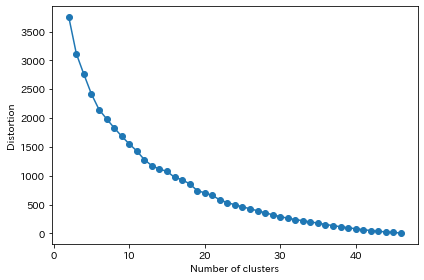

In [77]:
# エルボー法の適用
from sklearn.cluster import KMeans

distortions = []
min_num = 2
max_num = 47

for i in range(min_num,max_num):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=8)
    km.fit(train_data)
    distortions.append(km.inertia_)
    
plt.plot(range(min_num,max_num), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [78]:
# カラーリストの用意
colors = ["maroon","red","orange","peachpuff","gold","darkorange","olive",
          "yellow","yellowgreen","lightgreen","lime","darklivegreen","green",
          "lightcyan","aqua","lightskyblue","royalblue","blue","navy",
          "plum","magenta","purple","palevioletred","pink"]
print(len(colors))

24


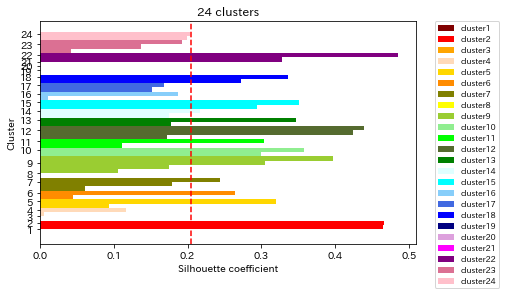

In [91]:
# シルエット分析により最適なクラスタ分割数を判断する。
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
colors = ["maroon","red","orange","peachpuff","gold","darkorange","olive",
          "yellow","yellowgreen","lightgreen","lime","darkolivegreen","green",
          "lightcyan","aqua","lightskyblue","royalblue","blue","navy",
          "plum","magenta","purple","palevioletred","pink"]
random_state = 20

#for num in range(16,26): #選択する場合
num = 24 #最適値
km = KMeans(n_clusters=num,
           init='k-means++',
           n_init=10000,
           max_iter=300,
           tol=1e-04,
           random_state=random_state)
y_km = km.fit_predict(train_data)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#シルエット係数を計算
silhouette_vals = silhouette_samples(train_data, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
graphs = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters) #色の値をリセット
    graphs.append(plt.barh(range(y_ax_lower, y_ax_upper), #水平の棒グラフを描画
            c_silhouette_vals, #棒の幅
            height=1.0, #棒の高さ
            edgecolor='none',
            color=colors[i]))
    yticks.append((y_ax_lower + y_ax_upper) / 2.) #クラスラベルの表示位置を追加
    y_ax_lower += len(c_silhouette_vals) #底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals) #シルエット係数の平均値
plt.title("{} clusters".format(i+1))
plt.axvline(silhouette_avg, color='red', linestyle='--') #係数の平均値に破線を引く
plt.yticks(yticks, cluster_labels + 1) #クラスタラベルを表示
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.legend([graphs[x] for x in range(num)],["cluster"+str(x+1) for x in range(num)],bbox_to_anchor=(1.05, 1), 
                    loc='upper left', borderaxespad=0, fontsize=8)
plt.show()

In [83]:
# クラスター数を24として、k-means法によりクラスタ分類を行う。
km = KMeans(n_clusters=24,
               init='k-means++',
               n_init=1000,
               max_iter=300,
               tol=1e-04,
               random_state=random_state)
y_km = km.fit_predict(train_data)

In [92]:
all_data["cluster_id"] = y_km

In [93]:
# クラスタごとの都道府県リストを作成。
clusters = []
for i in range(len(all_data["cluster_id"].unique())):
    clusters.append(all_data["都道府県"].loc[all_data["cluster_id"]==i].values)
    print("cluster {0}, データ数{1}\n {2}".format(i+1,len(all_data["都道府県"].loc[all_data["cluster_id"]==i].values),all_data["都道府県"].loc[all_data["cluster_id"]==i].values))

cluster 1, データ数1
 ['東京都']
cluster 2, データ数2
 ['山梨県' '長野県']
cluster 3, データ数1
 ['高知県']
cluster 4, データ数2
 ['岡山県' '広島県']
cluster 5, データ数2
 ['北海道' '青森県']
cluster 6, データ数2
 ['茨城県' '埼玉県']
cluster 7, データ数3
 ['佐賀県' '熊本県' '宮崎県']
cluster 8, データ数1
 ['沖縄県']
cluster 9, データ数4
 ['岩手県' '秋田県' '山形県' '福島県']
cluster 10, データ数2
 ['三重県' '滋賀県']
cluster 11, データ数2
 ['鳥取県' '徳島県']
cluster 12, データ数3
 ['栃木県' '群馬県' '静岡県']
cluster 13, データ数2
 ['石川県' '福井県']
cluster 14, データ数2
 ['和歌山県' '山口県']
cluster 15, データ数2
 ['京都府' '奈良県']
cluster 16, データ数2
 ['愛知県' '大阪府']
cluster 17, データ数2
 ['神奈川県' '兵庫県']
cluster 18, データ数2
 ['長崎県' '鹿児島県']
cluster 19, データ数1
 ['宮城県']
cluster 20, データ数1
 ['福岡県']
cluster 21, データ数1
 ['千葉県']
cluster 22, データ数2
 ['香川県' '愛媛県']
cluster 23, データ数3
 ['新潟県' '富山県' '岐阜県']
cluster 24, データ数2
 ['島根県' '大分県']


In [94]:
train_data["cluster_id"] = y_km
train_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,緯度,経度,cluster_id
0,-7.306000,3.418461,0.052728,1.423153,-0.835612,-0.492620,2.721380,0.391934,0.488095,1.727671,43.06417,141.34694,4
1,-4.794183,0.059707,-3.698114,0.465701,-1.620882,-0.699087,3.127160,-1.363836,-0.445052,1.438762,40.82444,140.74000,4
2,-2.754305,-3.875424,-3.132638,-0.038301,-2.045456,-1.438382,2.432904,0.180644,-1.972878,-1.794787,39.70361,141.15250,8
3,-2.235200,2.449872,-1.827686,-1.153839,-4.437192,-2.184572,0.966990,-2.427510,2.859231,1.975368,38.26889,140.87194,18
4,-1.979699,-3.926357,-3.573354,-1.586032,-0.653478,-0.837243,0.041180,-2.498034,-3.428422,-3.010760,39.71861,140.10250,8


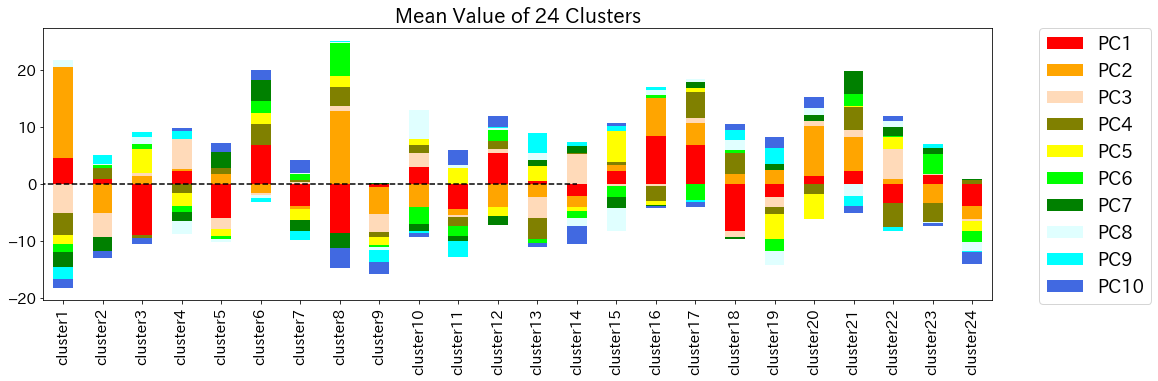

In [95]:
#　各クラスタの特性
pca_colors = ["red","orange","peachpuff","olive","yellow","lime",
        "green","lightcyan","aqua","royalblue","blue",
        "navy","plum","magenta","purple",]

clusterinfo = pd.DataFrame()
for i in range(len(all_data["cluster_id"].unique())):
    clusterinfo['cluster' + str(i+1)] = train_data[train_data['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop(['cluster_id',"緯度","経度"])

p = clusterinfo.T.plot(kind='bar', stacked=True, color=pca_colors,figsize=(17,5),fontsize=15).legend(bbox_to_anchor=(1.05, 1), 
                    loc='upper left', borderaxespad=0, fontsize=18)
p = plt.title("Mean Value of {} Clusters".format(len(all_data["cluster_id"].unique())), size=20);
p = plt.hlines([0],-1,13,"black", linestyles='dashed') 
plt.show(p)

In [96]:
# PCA の固有ベクトル
eigen = pd.DataFrame(pca.components_, columns=pca_data.columns, index=["PC{}".format(x + 1) for x in range(n_components)])
eigen

,01農業,02林業,03漁業（水産養殖業を除く）,04水産養殖業,05鉱業，採石業，砂利採取業,06総合工事業,07職別工事業（設備工事業を除く）,08設備工事業,09食料品製造業,10飲料・たばこ・飼料製造業,11繊維工業,12木材・木製品製造業（家具を除く）,13家具・装備品製造業,14パルプ・紙・紙加工品製造業,15印刷・同関連業,16化学工業,17石油製品・石炭製品製造業,18プラスチック製品製造業,19ゴム製品製造業,20なめし革・同製品・毛皮製造業,21窯業・土石製品製造業,22鉄鋼業,23非鉄金属製造業,24金属製品製造業,25はん用機械器具製造業,26生産用機械器具製造業,27業務用機械器具製造業,28電子部品・デバイス・電子回路製造業,29電気機械器具製造業,30情報通信機械器具製造業,31輸送用機械器具製造業,32その他の製造業,33電気業,34ガス業,35熱供給業,36水道業,37通信業,38放送業,39情報サービス業,40インターネット附随サービス業,41映像・音声・文字情報制作業,42鉄道業,43道路旅客運送業,44道路貨物運送業,45水運業,46航空運輸業,47倉庫業,48運輸に附帯するサービス業,49郵便業（信書便事業を含む）,50各種商品卸売業,51繊維・衣服等卸売業,52飲食料品卸売業,53建築材料，鉱物・金属材料等卸売業,54機械器具卸売業,55その他の卸売業,56各種商品小売業,57織物・衣服・身の回り品小売業,58飲食料品小売業,59機械器具小売業,60その他の小売業,61無店舗小売業,62銀行業,63協同組織金融業,64クレジットカード業等非預金信用機関,65金融商品取引業，商品先物取引業,66補助的金融業等,67保険業（保険媒介代理業等を含む）,68不動産取引業,69不動産賃貸業・管理業,70物品賃貸業,71学術・開発研究機関,72専門サービス業,73広告業,74技術サービス業,75宿泊業,76飲食店,77持ち帰り・配達飲食サービス業,78洗濯・理容・美容・浴場業,79その他の生活関連サービス業,80娯楽業,81学校教育,82その他の教育，学習支援業,83医療業,84保健衛生,85社会保険・社会福祉・介護事業,86郵便局,87協同組合（他に分類されないもの）,88廃棄物処理業,89自動車整備業,90機械等修理業（別掲を除く）,91職業紹介・労働者派遣業,92その他の事業サービス業,93政治・経済・文化団体,94宗教,95その他のサービス業,97国家公務,98地方公務
PC1,-0.149728,-0.195690,-0.258436,-0.323185,-0.147971,-0.115307,-0.003964,-0.042088,-0.039828,-0.055355,-0.028157,-0.050187,0.046290,0.061556,0.069715,0.167147,0.001972,0.177966,0.212202,0.114533,-0.027313,0.082738,0.207953,0.132879,0.198050,0.122762,0.147140,0.011163,0.160957,0.177325,0.155388,0.060505,-0.093194,0.037310,-0.080643,-0.004070,0.016108,-0.129106,0.075170,-0.019383,-0.036674,0.076767,-0.095972,0.070229,-0.212660,-0.048317,0.175405,0.101497,0.080661,-0.043492,0.090093,-0.099542,0.009444,0.052105,0.037259,0.017083,0.064273,-0.032862,-0.025782,-0.025782,0.002252,-0.069278,0.050801,0.008755,0.058352,0.015016,-0.068894,0.081666,0.017033,-0.046030,0.163330,0.025782,0.001201,0.033551,-0.103966,0.063338,-0.069318,-0.056157,-0.017756,0.008545,-0.012806,0.068572,-0.063001,-0.076055,-0.085503,-0.085753,-0.115468,-0.063886,-0.075361,0.048404,0.100604,0.011520,-0.113796,-0.033373,-0.033000,-0.105665,-0.099921
PC2,-0.166378,-0.217325,-0.160572,-0.126395,-0.085267,-0.085150,-0.088080,0.028577,-0.064912,-0.056227,-0.132128,-0.163449,-0.068578,-0.067954,0.035735,-0.074853,0.031384,-0.140712,-0.126805,-0.021006,-0.078838,-0.030244,-0.229926,-0.083676,-0.124482,-0.147263,-0.141677,-0.246455,-0.104149,-0.141123,-0.104637,-0.085087,-0.063263,0.073719,0.084120,-0.031573,0.126075,-0.008947,0.120354,0.191130,0.089223,0.010924,0.102734,-0.006228,0.166852,0.263210,0.049067,0.093936,0.029231,0.109697,0.100668,0.037341,0.067008,0.094074,0.076082,0.064435,0.118146,-0.023468,-0.049891,-0.049891,0.058894,0.037120,-0.067314,0.132987,0.075432,0.044449,0.083177,0.101073,0.113416,0.095882,0.037076,0.049891,0.132473,0.084935,-0.104419,0.133075,0.038144,-0.042151,0.045714,0.021345,0.074645,0.087857,0.093404,-0.048072,-0.008346,-0.057997,-0.123746,-0.080278,-0.071788,0.096399,0.046635,0.125849,-0.032521,-0.097858,-0.030832,0.079637,-0.075423
PC3,0.046924,0.018267,-0.153505,0.252806,-0.065242,-0.027528,-0.027090,0.056725,0.032252,-0.060118,-0.035554,0.124713,0.104860,0.068126,-0.010333,0.205845,0.237453,0.070385,0.189646,-0.053280,0.010010,0.180427,0.028291,0.049804,0.139681,0.016172,-0.176203,-0.207876,-0.048934,-0.329643,0.164675,-0.125205,-0.023842,-0.051835,-0.141945,0.104399,-0.011561,-0.155903,-0.069674,-0.074049,-0.080107,-0.028406,-0.017907,0.106222,0.403203,-0.024344,0.080961,0.066703,-0.059785,-0.043235,-0.027563,-0.052504,-0.005246,-0.010089,-0.031883,-0.038304,0.074954,0.054971,0.032135,0.032135,0.014091,0.020190,-0.019415,-0.023785,0.014935,-0.049875,-0.028901,-0.021837,-0.043651,0.007963,0.022299,-0.032135,-0.048088,0.008806,-0.116976,-0.012829,0.036493,-0.019343,-0.156257,0.026773,-0.099790,-0.005316,0.170889,-0.089430,0.118391,0.013997,0.045509,0.047929,-0.001938,0.077338,-0.027204,-0.031089,-0.112824,0.108453,-0.029675,-0.039407,0.024219
PC4,-0.012343,-0.093925,0.056700,0.053195,0.024640,-0.056762,0.006812,-0.107029,0.109662,0.152856,-0.255660,-0.144270,-0.190131,-0.154247,-0.1100

In [97]:
#固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(n_components)])

,0
PC1,23.284463
PC2,22.193737
PC3,8.203923
PC4,6.842841
PC5,5.563437
PC6,4.473689
PC7,4.091472
PC8,3.769437
PC9,3.412183
PC10,3.381160


In [98]:
# 各主成分の解釈

pca_feature_df = []
for i in range(n_components):
    #print("pca" + str(i+1))
    #print(abs(eigen.iloc[i]).sort_values(ascending = False).index[:5].values)
    row=[]
    for j in range(5):
        row.append(abs(eigen.iloc[i]).sort_values(ascending = False).index[:5].values[j])
        row.append(eigen.iloc[i][abs(eigen.iloc[i]).sort_values(ascending = False).index[j]])
    pca_feature_df.append(row)
    #print()
pca_factors = pd.DataFrame(pca_feature_df,columns=["1st_factor_name","1st_factor_loading",
                                                 "2nd_factor_name","2nd_factor_loading",
                                                 "3rd_factor_name","3rd_factor_loading",
                                                 "4th_factor_name","4th_factor_loading",
                                                 "5th_factor_name","5th_factor_loading"],
                                                 index=["pca"+str(x+1) for x in range(n_components)])

In [99]:
pca_factors

,1st_factor_name,1st_factor_loading,2nd_factor_name,2nd_factor_loading,3rd_factor_name,3rd_factor_loading,4th_factor_name,4th_factor_loading,5th_factor_name,5th_factor_loading
pca1,04水産養殖業,-0.323185,03漁業（水産養殖業を除く）,-0.258436,45水運業,-0.212660,19ゴム製品製造業,0.212202,23非鉄金属製造業,0.207953
pca2,46航空運輸業,0.263210,28電子部品・デバイス・電子回路製造業,-0.246455,23非鉄金属製造業,-0.229926,02林業,-0.217325,40インターネット附随サービス業,0.191130
pca3,45水運業,0.403203,30情報通信機械器具製造業,-0.329643,04水産養殖業,0.252806,17石油製品・石炭製品製造業,0.237453,28電子部品・デバイス・電子回路製造業,-0.207876
pca4,11繊維工業,-0.255660,71学術・開発研究機関,0.243656,53建築材料，鉱物・金属材料等卸売業,-0.240694,80娯楽業,0.238857,84保健衛生,-0.214020
pca5,19ゴム製品製造業,-0.318573,30情報通信機械器具製造業,-0.275615,14パルプ・紙・紙加工品製造業,0.227060,79その他の生活関連サービス業,-0.185976,15印刷・同関連業,0.183544
pca6,42鉄道業,-0.335505,46航空運輸業,0.254208,36水道業,-0.247663,30情報通信機械器具製造業,-0.240629,81学校教育,-0.228767
pca7,03漁業（水産養殖業を除く）,0.566411,44道路貨物運送業,0.261440,10飲料・たばこ・飼料製造業,-0.240731,22鉄鋼業,0.214382,95その他のサービス業,0.207894
pca8,35熱供給業,0.588624,20なめし革・同製品・毛皮製造業,-0.289374,25はん用機械器具製造業,0.240770,56各種商品小売業,-0.189313,29電気機械器具製造業,0.181448
pca9,20なめし革・同製品・毛皮製造業,-0.364715,35熱供給業,-0.309960,63協同組織金融業,0.261990,03漁業（水産養殖業を除く）,0.238482,62銀行業,-0.210371
pca10,17石油製品・石炭製品製造業,-0.272055,09食料品製造業,0.250842,67保険業（保険媒介代理業等を含む）,0.226208,21窯業・土石製品製造業,-0.218186,05鉱業，採石業，砂利採取業,-0.207967


In [100]:
#特定の業種に対するランキング作成

#フォーカスしたい業種
serch_factor = "46航空運輸業"
#クラスタnum
cluster_num = 1
#該当業種のクラスタ内の都市にフォーカスしたランキング
#all_data[["都道府県",serch_factor]].loc[all_data["都道府県"].isin(clusters[cluster_num-1])].sort_values(serch_factor,ascending=False)
#該当業種の全都市のランキング
all_data[["都道府県",serch_factor]].sort_values(serch_factor,ascending=False)

,都道府県,46航空運輸業
12,東京都,2
46,沖縄県,1
11,千葉県,1
20,岐阜県,0
45,鹿児島県,-1
44,宮崎県,-1
41,長崎県,-1
39,福岡県,-1
26,大阪府,-1
22,愛知県,-1


In [101]:
# 特定のクラスタにおける強い産業
cluster_num = 9
print("cluster {} : {}".format(cluster_num,clusters[cluster_num-1]))
pd.DataFrame(all_data.drop("cluster_id",axis=1).loc[all_data["都道府県"].isin(clusters[cluster_num-1])].mean()[1:],columns=["業種"]).sort_values("業種",ascending=False)[:10]

cluster 9 : ['岩手県' '秋田県' '山形県' '福島県']


,業種
28電子部品・デバイス・電子回路製造業,1.75
02林業,1.50
26生産用機械器具製造業,1.25
27業務用機械器具製造業,1.25
88廃棄物処理業,1.00
87協同組合（他に分類されないもの）,1.00
86郵便局,1.00
84保健衛生,1.00
79その他の生活関連サービス業,1.00
89自動車整備業,1.00


In [102]:
# 各クラスタにおける主要産業を格納（後に表として掲出するための処理）
cluster_num = 3
factor_1 = [] 
factor_2 = []
factor_3 = []

for i in range(len(clusters)):
    factor_1.append(pd.DataFrame(all_data.drop("cluster_id",axis=1).loc[all_data["都道府県"].isin(clusters[i])].mean()[1:],columns=["業種"]).sort_values("業種",ascending=False).index[0])
    factor_2.append(pd.DataFrame(all_data.drop("cluster_id",axis=1).loc[all_data["都道府県"].isin(clusters[i])].mean()[1:],columns=["業種"]).sort_values("業種",ascending=False).index[1])
    factor_3.append(pd.DataFrame(all_data.drop("cluster_id",axis=1).loc[all_data["都道府県"].isin(clusters[i])].mean()[1:],columns=["業種"]).sort_values("業種",ascending=False).index[2])

In [104]:
# 各クラスタに対し色を分配する。
color_map = {}
colors = ["maroon","red","orange","peachpuff","gold","darkorange","olive",
          "yellow","yellowgreen","lightgreen","lime","darkolivegreen","green",
          "lightcyan","aqua","lightskyblue","royalblue","blue","navy",
          "plum","magenta","purple","palevioletred","pink"]

for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        color_map[list(clusters[i])[j]] = colors[i]

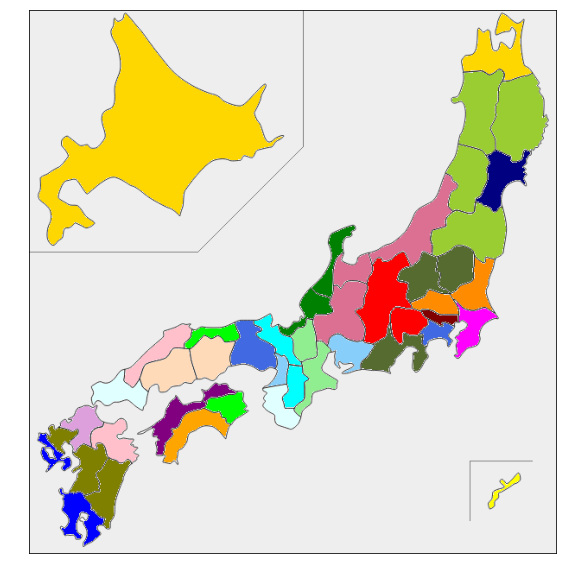

In [105]:
# japanmapライブラリを用いて、都道府県をクラスタごとに色分けする。
from japanmap import picture

plt.figure(figsize=(10,10))
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.imshow(picture(color_map))
plt.show()

In [106]:
# クラスタリングの結果を表にまとめる。
cluster_num = ["cluster"+str(x+1) for x in range(len(clusters))]
result_of_clustering = pd.DataFrame({"都道府県":clusters,
                                    "1st_factor":factor_1,
                                    "2nd_factor":factor_2,
                                    "3rd_factor":factor_3}
                                    ,index=cluster_num)

In [107]:
for i in range(len(clusters)):
    result_of_clustering["都道府県"].values[i] = list(result_of_clustering["都道府県"].values[i])

In [108]:
result_of_clustering

,都道府県,1st_factor,2nd_factor,3rd_factor
cluster1,[東京都],50各種商品卸売業,46航空運輸業,73広告業
cluster2,"[山梨県, 長野県]",28電子部品・デバイス・電子回路製造業,26生産用機械器具製造業,27業務用機械器具製造業
cluster3,[高知県],02林業,04水産養殖業,03漁業（水産養殖業を除く）
cluster4,"[岡山県, 広島県]",45水運業,31輸送用機械器具製造業,02林業
cluster5,"[北海道, 青森県]",03漁業（水産養殖業を除く）,97国家公務,02林業
cluster6,"[茨城県, 埼玉県]",47倉庫業,25はん用機械器具製造業,71学術・開発研究機関
cluster7,"[佐賀県, 熊本県, 宮崎県]",02林業,19ゴム製品製造業,97国家公務
cluster8,[沖縄県],45水運業,98地方公務,40インターネット附随サービス業
cluster9,"[岩手県, 秋田県, 山形県, 福島県]",28電子部品・デバイス・電子回路製造業,02林業,26生産用機械器具製造業
cluster10,"[三重県, 滋賀県]",28電子部品・デバイス・電子回路製造業,31輸送用機械器具製造業,29電気機械器具製造業


In [109]:
# 都道府県ごとの雇用力データ
employ_power = pd.read_csv("pre_employ_power.csv")
employ_power

,都道府県,01農業,02林業,03漁業（水産養殖業を除く）,04水産養殖業,05鉱業，採石業，砂利採取業,06総合工事業,07職別工事業（設備工事業を除く）,08設備工事業,09食料品製造業,10飲料・たばこ・飼料製造業,11繊維工業,12木材・木製品製造業（家具を除く）,13家具・装備品製造業,14パルプ・紙・紙加工品製造業,15印刷・同関連業,16化学工業,17石油製品・石炭製品製造業,18プラスチック製品製造業,19ゴム製品製造業,20なめし革・同製品・毛皮製造業,21窯業・土石製品製造業,22鉄鋼業,23非鉄金属製造業,24金属製品製造業,25はん用機械器具製造業,26生産用機械器具製造業,27業務用機械器具製造業,28電子部品・デバイス・電子回路製造業,29電気機械器具製造業,30情報通信機械器具製造業,31輸送用機械器具製造業,32その他の製造業,33電気業,34ガス業,35熱供給業,36水道業,37通信業,38放送業,39情報サービス業,40インターネット附随サービス業,41映像・音声・文字情報制作業,42鉄道業,43道路旅客運送業,44道路貨物運送業,45水運業,46航空運輸業,47倉庫業,48運輸に附帯するサービス業,49郵便業（信書便事業を含む）,50各種商品卸売業,51繊維・衣服等卸売業,52飲食料品卸売業,53建築材料，鉱物・金属材料等卸売業,54機械器具卸売業,55その他の卸売業,56各種商品小売業,57織物・衣服・身の回り品小売業,58飲食料品小売業,59機械器具小売業,60その他の小売業,61無店舗小売業,62銀行業,63協同組織金融業,64クレジットカード業等非預金信用機関,65金融商品取引業，商品先物取引業,66補助的金融業等,67保険業（保険媒介代理業等を含む）,68不動産取引業,69不動産賃貸業・管理業,70物品賃貸業,71学術・開発研究機関,72専門サービス業,73広告業,74技術サービス業,75宿泊業,76飲食店,77持ち帰り・配達飲食サービス業,78洗濯・理容・美容・浴場業,79その他の生活関連サービス業,80娯楽業,81学校教育,82その他の教育，学習支援業,83医療業,84保健衛生,85社会保険・社会福祉・介護事業,86郵便局,87協同組合（他に分類されないもの）,88廃棄物処理業,89自動車整備業,90機械等修理業（別掲を除く）,91職業紹介・労働者派遣業,92その他の事業サービス業,93政治・経済・文化団体,94宗教,95その他のサービス業,97国家公務,98地方公務
0,北海道,1.34756,0.19772,0.22997,0.04151,0.08113,4.24869,1.75712,1.98420,3.82833,0.20228,0.16555,0.36204,0.20162,0.28596,0.39873,0.17341,0.04603,0.20180,0.03229,0.02356,0.34120,0.26950,0.02102,0.58837,0.13168,0.23918,0.03058,0.24884,0.10584,0.06209,0.40965,0.17003,0.28017,0.04717,0.01071,0.05704,0.15322,0.09974,1.01132,0.07784,0.29508,0.37780,1.33470,3.19529,0.05906,0.03743,0.23330,0.51913,0.08245,0.02378,0.14875,1.59596,1.17139,1.49389,1.36845,0.81439,1.10860,5.69805,1.63036,5.16641,0.48113,0.49965,0.38626,0.14164,0.03796,0.04340,1.20509,0.37819,1.62636,0.51593,0.24125,0.72352,0.13712,1.28595,1.74980,6.50112,1.03220,2.26011,0.60610,1.57266,1.84383,0.87955,7.32639,0.10575,6.74034,0.87314,0.54291,0.54348,0.62224,0.34844,1.00351,5.10103,0.50447,0.44870,0.10426,2.20833,2.85927
1,青森県,1.13153,0.21848,0.18276,0.02689,0.08254,5.46002,1.91032,2.16791,3.36130,0.27715,1.10107,0.21642,0.14722,0.22864,0.37605,0.10548,0.03215,0.16226,0.03215,0.00432,0.39147,0.30667,0.57046,0.51838,0.05359,0.33412,0.94689,1.21106,0.49074,0.09082,0.27245,0.20269,0.32566,0.03347,0.00000,0.01955,0.13387,0.12391,0.44599,0.08856,0.19291,0.30911,1.19884,3.05050,0.02482,0.00696,0.17336,0.34296,0.14534,0.03572,0.08292,2.18201,1.10953,1.21745,1.00066,0.59133,1.04391,5.97652,1.83191,5.41433,0.63458,0.86322,0.32359,0.08348,0.04362,0.02651,1.23964,0.25759,0.95873,0.43245,0.13876,0.61277,0.05942,1.28101,1.43688,5.45212,0.91285,2.49225,0.77673,1.33534,1.80691,0.85363,5.23044,0.16471,8.53759,0.65470,0.50052,0.65094,0.79496,0.37943,0.70076,3.71460,0.44844,0.15700,0.06618,2.78275,3.47881
2,岩手県,1.36247,0.29887,0.16409,0.04881,0.14279,5.63493,1.82179,1.79884,3.78582,0.23822,1.01116,0.51468,0.15736,0.26681,0.43018,0.28138,0.03169,0.66184,0.10071,0.09562,0.63816,0.42981,0.15918,1.03447,0.67386,1.24883,0.49520,1.46920,0.58298,0.41470,1.16614,0.61412,0.23603,0.03260,0.00838,0.07831,0.10764,0.14042,0.49228,0.06921,0.23986,0.66330,1.04758,3.26276,0.00892,0.00364,0.16355,0.33893,0.14661,0.05209,0.10254,1.46027,1.10914,1.37395,1.03028,0.41215,1.04576,5.66425,1.90429,5.12061,0.48445,0.73797,0.30542,0.07303,0.02732,0.02823,1.00678,0.20635,1.22661,0.58079,0.13186,0.52197,0.06429,1.20166,1.98151,4.99822,0.77949,2.12849,0.68788,1.36120,1.21350,0.80772,4.97491,0.15918,7.88144,0.72340,0.79825,0.62851,0.68788,0.26754,0.98675,2.77321,0.58007,0.40468,0.09980,0.76146,3.62810
3,宮城県,0.55414,0.09259,0.07869,0.03544,0.04211,4.99076,1.95991,2.53682,2.88119,0.20129,0.36228,0.21929,0.19071,0.26387,0.51641,0.18100,0.05525,0.39276,0.23130,0.02210,0.42772,0.21672,0.14566,0.84735,0.13289,0.60110,0.29836,1.18020,0.57338,0.32351,0.94004,0.23701,0.42953,0.00810,0.00019,0.04830,0.25844,0.12498,1.14343,0.10384,0.25273,0.42001,1.01987,3.55126,0.02658,0.03468,0.29826,0.57948,0.13899,0.13260,0.14928,1.59335,1.61688,2.41898,1.69928,0.64178,1.23688,5.28321,1.71119,4.43758,0.52261,0.71856,0.20167,0.17433,0.03877,0.04249,1.25764,0.41858,1.38272,0.65483,0.34913,

In [110]:
#各クラスタの主要産業における雇用力を算出

factor_1_mean = []
factor_2_mean = []
factor_3_mean = []

for i in range(len(clusters)):
    factor_1_mean.append(employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_1[j]].mean())
    factor_2_mean.append(employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_2[j]].mean())
    factor_3_mean.append(employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_3[j]].mean())
    print("cluter"+str(i+1)+":{}".format(clusters[i]))
    print("{} : {} mean{}".format(factor_1[i],employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_1[j]].values,employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_1[j]].mean()))
    print("{} : {} mean{}".format(factor_2[i],employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_2[j]].values,employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_2[j]].mean()))
    print("{} : {} mean{}".format(factor_3[i],employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_3[j]].values,employ_power.loc[employ_power["都道府県"].isin(list(clusters[i]))][factor_3[j]].mean()))
    print()

pd.DataFrame({"都道府県":clusters,
              "主要産業1":factor_1, "主要産業1_平均雇用力":factor_1_mean,
              "主要産業2":factor_2, "主要産業2_平均雇用力":factor_2_mean,
              "主要産業3":factor_3, "主要産業3_平均雇用力":factor_3_mean,
             })

cluter1:['東京都']
50各種商品卸売業 : [0.19888] mean0.19888
46航空運輸業 : [0.36483] mean0.36483000000000004
73広告業 : [0.34447] mean0.34447

cluter2:['山梨県' '長野県']
28電子部品・デバイス・電子回路製造業 : [1.83954 2.78118] mean2.31036
26生産用機械器具製造業 : [2.38851 2.32358] mean2.356045
27業務用機械器具製造業 : [0.94714 1.2699 ] mean1.10852

cluter3:['高知県']
02林業 : [0.32526] mean0.32526
04水産養殖業 : [1.04847] mean1.04847
03漁業（水産養殖業を除く） : [0.17133] mean0.17132999999999998

cluter4:['岡山県' '広島県']
45水運業 : [0.64349 0.5492 ] mean0.596345
31輸送用機械器具製造業 : [1.20193 1.65377] mean1.4278499999999998
02林業 : [0.16736 0.23031] mean0.19883499999999998

cluter5:['北海道' '青森県']
03漁業（水産養殖業を除く） : [0.24884 1.21106] mean0.72995
97国家公務 : [0.23918 0.33412] mean0.28665
02林業 : [0.03058 0.94689] mean0.48873500000000003

cluter6:['茨城県' '埼玉県']
47倉庫業 : [0.74673 0.59834] mean0.672535
25はん用機械器具製造業 : [1.55546 1.0316 ] mean1.29353
71学術・開発研究機関 : [1.1518  0.58631] mean0.8690549999999999

cluter7:['佐賀県' '熊本県' '宮崎県']
02林業 : [0.84148 1.35216 0.84239] mean1.0120099999999999
19ゴム製品製造業

,都道府県,主要産業1,主要産業1_平均雇用力,主要産業2,主要産業2_平均雇用力,主要産業3,主要産業3_平均雇用力
0,[東京都],50各種商品卸売業,0.198880,46航空運輸業,0.364830,73広告業,0.344470
1,"[山梨県, 長野県]",28電子部品・デバイス・電子回路製造業,2.310360,26生産用機械器具製造業,2.356045,27業務用機械器具製造業,1.108520
2,[高知県],02林業,0.325260,04水産養殖業,1.048470,03漁業（水産養殖業を除く）,0.171330
3,"[岡山県, 広島県]",45水運業,0.596345,31輸送用機械器具製造業,1.427850,02林業,0.198835
4,"[北海道, 青森県]",03漁業（水産養殖業を除く）,0.729950,97国家公務,0.286650,02林業,0.488735
5,"[茨城県, 埼玉県]",47倉庫業,0.672535,25はん用機械器具製造業,1.293530,71学術・開発研究機関,0.869055
6,"[佐賀県, 熊本県, 宮崎県]",02林業,1.012010,19ゴム製品製造業,1.022683,97国家公務,0.161633
7,[沖縄県],45水運業,0.010270,98地方公務,0.043120,40インターネット附随サービス業,0.027040
8,"[岩手県, 秋田県, 山形県, 福島県]",28電子部品・デバイス・電子回路製造業,2.162525,02林業,1.459830,26生産用機械器具製造業,0.792135
9,"[三重県, 滋賀県]",28電子部品・デバイス・電子回路製造業,2.341385,31輸送用機械器具製造業,1.657800,29電気機械器具製造業,0.575900
